# 1. 이해하기

## 1.1. process 이해

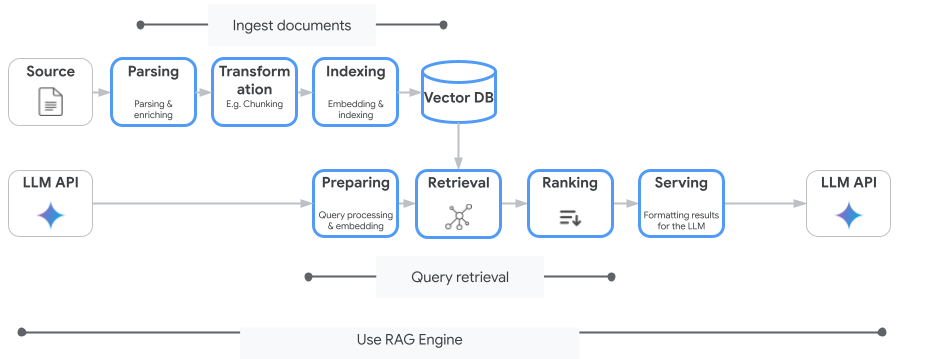

## 1.2. 지원되는 데이터 소스

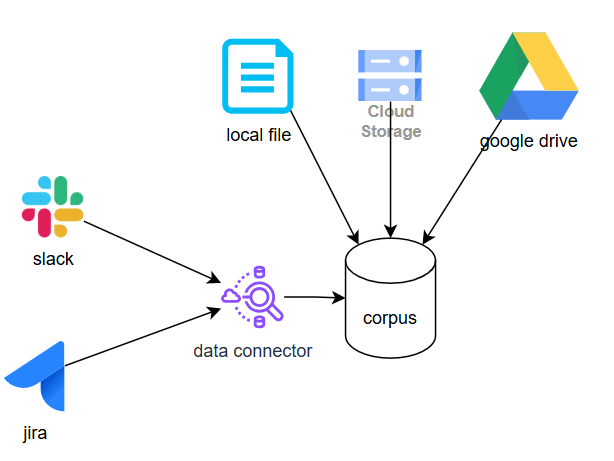

## 1.3. 지원되는 문서 유형

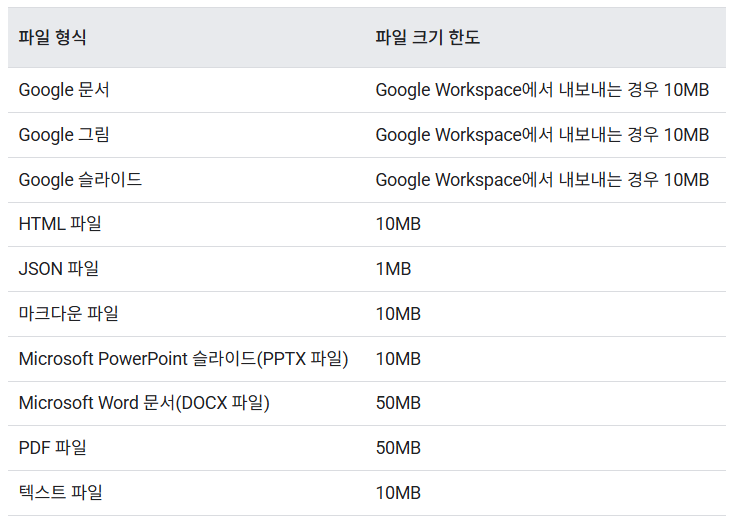

## 1.4. reference

* https://cloud.google.com/vertex-ai/generative-ai/docs/rag-overview
* https://cloud.google.com/vertex-ai/generative-ai/docs/rag-overview?hl=ko

## 1.5 코드 흐림 이해하기

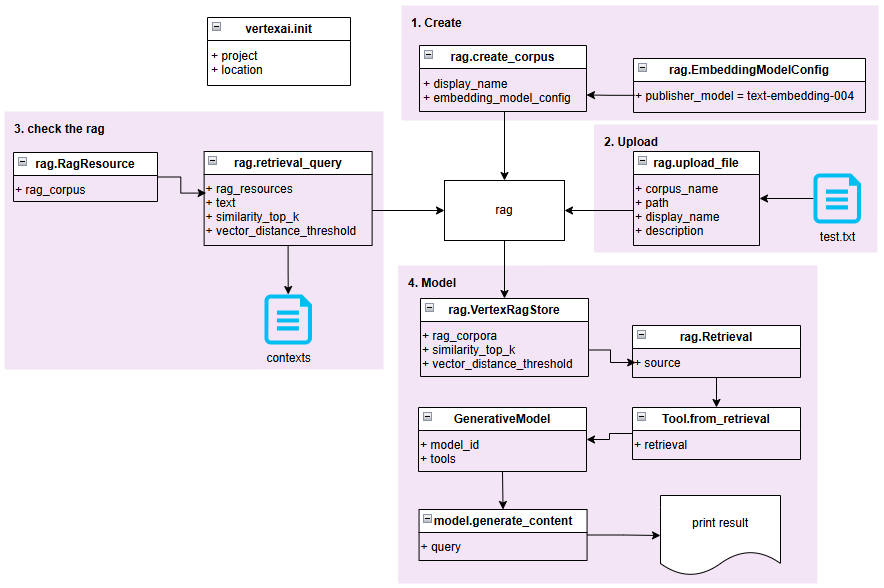

# 2. 환경설정

## 2.1 라이브러리 설치

In [1]:
!pip install google-cloud-aiplatform

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 2.2 환경변수 설정

In [1]:
import os

PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))
LOCATION = str(os.environ.get("GOOGLE_CLOUD_REGION", "us-central1"))

print(f"PROJECT_ID: {PROJECT_ID}")
print(f"LOCATION: {LOCATION}")

PROJECT_ID: younkicho-364103
LOCATION: us-central1


##2.3 Gemini 초기화

In [2]:
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

# 3. RAG 구현

## 3.1 RAG Corpus 생성

In [3]:
from vertexai.preview import rag

EMBEDDING_MODEL = "publishers/google/models/text-embedding-004"
DISPLAY_NAME="local-rag-corpus"

In [4]:
embedding_model_config = rag.EmbeddingModelConfig(publisher_model=EMBEDDING_MODEL)

rag_corpus = rag.create_corpus(
    display_name=DISPLAY_NAME,
    embedding_model_config=embedding_model_config,
)

In [5]:
rag.list_corpora()

ListRagCorporaPager<rag_corpora {
  name: "projects/younkicho-364103/locations/us-central1/ragCorpora/6917529027641081856"
  display_name: "alphabet-contracts-corpus"
  create_time {
    seconds: 1738311226
    nanos: 279903000
  }
  update_time {
    seconds: 1738311226
    nanos: 279903000
  }
  corpus_status {
    state: ACTIVE
  }
  vertex_ai_search_config {
    serving_config: "projects/younkicho-364103/locations/global/collections/default_collection/engines/alphabet-contracts-engine-id/servingConfigs/default_search"
  }
}
rag_corpora {
  name: "projects/younkicho-364103/locations/us-central1/ragCorpora/3458764513820540928"
  display_name: "alphabet-contracts-corpus"
  create_time {
    seconds: 1738553088
    nanos: 603313000
  }
  update_time {
    seconds: 1738553088
    nanos: 603313000
  }
  corpus_status {
    state: ACTIVE
  }
  vertex_ai_search_config {
    serving_config: "projects/younkicho-364103/locations/global/collections/default_collection/engines/alphabet-contracts

## 3.2 upload

### 3.2.1 upload a local file

In [6]:
%%writefile test.txt

vertex ai에서 RAG Engine을 사용하기 위한 demo입니다.

Writing test.txt


In [7]:
rag_file = rag.upload_file(
    corpus_name=rag_corpus.name,
    path="test.txt",
    display_name="test.txt",
    description="local에 있는 파일을 업로드함."
)

In [8]:
from IPython.display import display, Markdown

display(Markdown(f"{rag_file}"))

RagFile(name='projects/429718924597/locations/us-central1/ragCorpora/5685794529555251200/ragFiles/5367355194561544893', display_name='test.txt', description='local에 있는 파일을 업로드함.')

# 4 결과 확인

## 4.1 문서 찾기

In [9]:
local_rag_corpus = rag.RagResource(rag_corpus = rag_corpus.name)
query = "RAG란?"

response = rag.retrieval_query(
    rag_resources=[local_rag_corpus],
    text=query,
    similarity_top_k=1,  # Optional
    vector_distance_threshold=0.5,  # Optional
)

print(response)

contexts {
  contexts {
    source_uri: "test.txt"
    source_display_name: "test.txt"
    text: "vertex ai에서 RAG Engine을 사용하기 위한 demo입니다."
    distance: 0.41765913799172449
    score: 0.41765913799172449
  }
}



## 4.2 parameter 확인

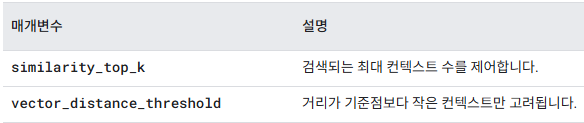

In [ ]:
%%writefile tmp.txt

RAG는 Retrieval-Augmented Generation의 약자이다.

Writing tmp.txt


In [ ]:
%%writefile tmp2.txt

LLM은 Large Language Model의 약자이다.

Writing tmp2.txt


In [ ]:
rag_file = rag.upload_file(
    corpus_name=rag_corpus.name,
    path="tmp.txt",
    display_name="tmp.txt",
    description="rag 정의"
)

In [ ]:
rag_file = rag.upload_file(
    corpus_name=rag_corpus.name,
    path="tmp2.txt",
    display_name="tmp2.txt",
    description="llm 정의"
)

In [ ]:
def test_rag_retrieval_query(query, sim_top_k, threshold):
  local_rag_corpus = rag.RagResource(rag_corpus=rag_corpus.name)

  response = rag.retrieval_query(
      rag_resources= [local_rag_corpus],
      text=query,
      similarity_top_k=sim_top_k,
      vector_distance_threshold=threshold,
  )

  print(response)

In [ ]:
test_rag_retrieval_query("RAG란?", 1, 1)

contexts {
  contexts {
    source_uri: "tmp.txt"
    source_display_name: "tmp.txt"
    text: "RAG는 Retrieval-Augmented Generation의 약자이다."
    distance: 0.32826042775211972
    score: 0.32826042775211972
  }
}



In [ ]:
test_rag_retrieval_query("RAG란?", 2, 1)

contexts {
  contexts {
    source_uri: "tmp.txt"
    source_display_name: "tmp.txt"
    text: "RAG는 Retrieval-Augmented Generation의 약자이다."
    distance: 0.32826042775211972
    score: 0.32826042775211972
  }
  contexts {
    source_uri: "test.txt"
    source_display_name: "test.txt"
    text: "vertex ai에서 RAG Engine을 사용하기 위한 demo입니다."
    distance: 0.41765913799172449
    score: 0.41765913799172449
  }
}



In [ ]:
test_rag_retrieval_query("RAG란?", 10, 1)

contexts {
  contexts {
    source_uri: "tmp.txt"
    source_display_name: "tmp.txt"
    text: "RAG는 Retrieval-Augmented Generation의 약자이다."
    distance: 0.32826042775211972
    score: 0.32826042775211972
  }
  contexts {
    source_uri: "test.txt"
    source_display_name: "test.txt"
    text: "vertex ai에서 RAG Engine을 사용하기 위한 demo입니다."
    distance: 0.41765913799172449
    score: 0.41765913799172449
  }
  contexts {
    source_uri: "tmp2.txt"
    source_display_name: "tmp2.txt"
    text: "LLM은 Large Language Model의 약자이다."
    distance: 0.55310360239623968
    score: 0.55310360239623968
  }
}



In [ ]:
test_rag_retrieval_query("LLM에 대해 설명해줘", 10, 1)

contexts {
  contexts {
    source_uri: "tmp2.txt"
    source_display_name: "tmp2.txt"
    text: "LLM은 Large Language Model의 약자이다."
    distance: 0.19773748113130274
    score: 0.19773748113130274
  }
  contexts {
    source_uri: "tmp.txt"
    source_display_name: "tmp.txt"
    text: "RAG는 Retrieval-Augmented Generation의 약자이다."
    distance: 0.4239930019282262
    score: 0.4239930019282262
  }
  contexts {
    source_uri: "test.txt"
    source_display_name: "test.txt"
    text: "vertex ai에서 RAG Engine을 사용하기 위한 demo입니다."
    distance: 0.42555557445248893
    score: 0.42555557445248893
  }
}



실행 결과 similarity_top_k는 query와 유사한 문서의 최대 출력 수를 지정하게 되며 vector_distance_threshold는 수치가 작을 수록 유사한 문서라는 것을 알 수 있다.

## 4.3 모델 만들기

In [ ]:
from vertexai.preview.generative_models import (
    GenerativeModel,
    Tool
)
source = rag.VertexRagStore(
    rag_corpora=[rag_corpus.name],
    similarity_top_k=10,
    vector_distance_threshold=0.5
)

retrieval = rag.Retrieval(source=source)
rag_retrieval_tool = Tool.from_retrieval(retrieval)

In [ ]:
rag_gemini_model = GenerativeModel(
    "gemini-1.5-flash",
    tools=[rag_retrieval_tool]
)

In [ ]:
query="""
RAG란?
참조한 file도 함께 보여줘
"""

response = rag_gemini_model.generate_content(query)

display(Markdown(response.text))

RAG는 Retrieval-Augmented Generation의 약자입니다. vertex ai에서 RAG Engine을 사용하기 위한 데모입니다. 

참조 파일: tmp.txt, test.txt 


## 4.4 RAG 삭제

In [ ]:
corpus_list=rag.list_corpora()
for t in corpus_list:
  print(t.name)
  print(t.display_name)

projects/younkicho-364103/locations/us-central1/ragCorpora/4611686018427387904
my-rag-corpus
projects/younkicho-364103/locations/us-central1/ragCorpora/2305843009213693952
my-rag-corpus
projects/younkicho-364103/locations/us-central1/ragCorpora/5764607523034234880
local-rag-corpus


In [ ]:
for corpus in corpus_list:
  rag.delete_corpus(name=corpus.name)

Successfully deleted the RagCorpus.
Successfully deleted the RagCorpus.
Successfully deleted the RagCorpus.


In [ ]:
rag.list_corpora()

ListRagCorporaPager<>

# 5. 참조문서

* https://cloud.google.com/vertex-ai/generative-ai/docs/rag-quickstart
* https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/rag-engine/intro_rag_engine.ipynb
* https://cloud.google.com/vertex-ai/generative-ai/docs/rag-overview?hl=ko#retrieval-params
* https://cloud.google.com/vertex-ai/generative-ai/docs/samples/generativeaionvertexai-rag-delete-corpus?hl=ko